In [28]:
import cv2
import numpy as np
from PIL import Image as im

In [29]:
class VehicleDetector:

    def __init__(self):
        # Load Network
        #net = cv2.dnn.readNet wale line me direct files nahi dalke pahale 2 variables banake usme path save kar fir un variables ko use kar
        modelConfiguration = "yolov4.cfg"
        modelWeights = "yolov4.weights"
        net = cv2.dnn.readNet(modelWeights, modelConfiguration)
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832, 832), scale=1 / 255)


        # Allow classes containing Vehicles only
        self.classes_allowed = [2, 3, 5, 6, 7]


    def detect_vehicles(self, img):
        # Detect Objects
        vehicles_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        for class_id, score, box in zip(class_ids, scores, boxes):
            if score < 0.5:
                # Skip detection with low confidence
                continue

            if class_id in self.classes_allowed:
                vehicles_boxes.append(box)

        return vehicles_boxes

In [30]:
vd = VehicleDetector()
img = cv2.imread("buddu.png")
# print(img)
vehicle_boxes = vd.detect_vehicles(img)
print(vehicle_boxes)
vehicle_count = len(vehicle_boxes)
print(vehicle_count)

for box in vehicle_boxes:
    x, y, w, h = box

    cv2.rectangle(img, (x, y), (x + w, y + h), (25, 0, 180), 3)

    a = cv2.putText(img, "Vehicles: " + str(vehicle_count), (20, 50), 0, 2, (100, 200, 0), 3)

    data = im.fromarray(a)
    # print(len(data))

    data.save('result_pic4.png')

[array([238, 244, 122,  65]), array([166, 209, 106,  96]), array([224, 165,  98,  83]), array([ 53, 188,  86,  69]), array([329, 173,  90,  79]), array([  1, 203,  34,  56]), array([ 12, 160,  74,  64]), array([284, 143,  75,  76]), array([ 39, 242,  39,  45]), array([151,  23,  83,  55]), array([ 52, 243, 145,  66]), array([  0,  37, 122,  82]), array([194,   5,  82,  47])]
13


In [31]:
import matplotlib.pyplot as plt

In [32]:
cap = cv2.VideoCapture(0)
ret , frame = cap.read()
cap.release()

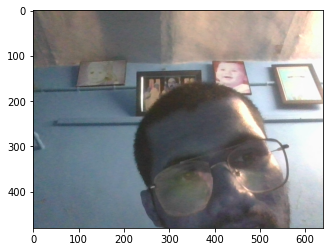

In [33]:
plt.imshow(frame)

In [34]:
cap = cv2.VideoCapture(1)
ret , frame = cap.read()
cap.release()

In [36]:
plt.imshow(frame)

In [37]:
# print(frame)

In [38]:
import matplotlib.pyplot as plt

In [46]:
def get_img(camera_id):
    cap = cv2.VideoCapture(camera_id)
    ret , frame = cap.read()
    cap.release()

    if ret == True:
#         plt.imshow(frame)
#         cap.release()
#         img.imsave('image.png', frame)
          #to release the camera
        return frame

    else:
        return "camera not connected try another id"

In [47]:
vd = VehicleDetector()

def vehicle_count(images_array):   
    for img in images_array:
        vehicle_boxes = vd.detect_vehicles(img)
        vehicle_count = len(vehicle_boxes)
        print(vehicle_count)
        vehicles_folder_count.append(vehicle_count)
        print(vehicles_folder_count)
        
        for box in vehicle_boxes:
            x, y, w, h = box

            cv2.rectangle(img, (x, y), (x + w, y + h), (25, 0, 180), 3)

            a = cv2.putText(img, "Vehicles: " + str(vehicle_count), (20, 50), 0, 2, (100, 200, 0), 3)

            data = im.fromarray(a)
            im.show(data)

    return vehicles_folder_count

In [48]:
vehicles_folder_count=[]

0
[0]
[0]


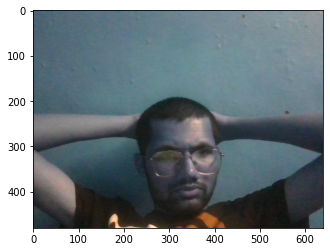

In [49]:
cam1 = get_img(0)
cam2 = get_img(1)
# cam3 = get_img(2)
# cam4 = get_img(3)

plt.imshow(cam1)
# plt.imshow(cam2)

images = [cam1,cam2] #,cam2,cam3,cam4

side = vehicle_count(images)
print(side)

In [20]:
max_id = vehicles_folder_count.index(max(vehicles_folder_count))

In [21]:
print(f"camera with max vehicles is {max_id}")

camera with max vehicles is 0
